<a href="https://colab.research.google.com/github/ledduy610/UIT-COVID-19/blob/main/T4C_NewsParsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News Parsing

* Mục đích: rút trích thông tin về số ca nhiễm (F0) từ các nguồn tin của VNE

## Input: Đoạn văn bản như bên dưới
* https://vnexpress.net/them-609-ca-covid-19-tong-so-ca-trong-ngay-vuot-2-000-4308478.html
```
Số ca mới nâng tổng số ca nhiễm tại TP HCM lên 14.776, Bắc Ninh 1.667, Bình Dương 1.628, Đồng Tháp 618, Hà Nội 533, Tiền Giang 470, Phú Yên 466, Đà Nẵng 270, Khánh Hòa 215, Quảng Ngãi 177, An Giang 90, Trà Vinh 35, Bình Phước 29, Hậu Giang 22, Sóc Trăng 18, Thanh Hóa 17, Nam Định 9, Đăk Nông 3
```

* https://vnexpress.net/them-466-ca-covid-19-tp-hcm-vuot-15-000-ca-4308540.html
````
466 ca mới từ số 32200-32665. Trong đó, 465 ca ghi nhận tại: TP HCM (365), Long An (52), Vĩnh Long (23), Đồng Nai (12), Phú Yên (7), Tây Ninh (5), Hà Nội (1). Trong số này, 416 ca được phát hiện ở khu cách ly hoặc khu đã được phong tỏa.

Số ca mới nâng tổng số ca nhiễm tại TP HCM lên 15.141, Hà Nội 534, Phú Yên 473, Long An 445, Đồng Nai 253, Vĩnh Long 175, Tây Ninh 28.
```

# Output: số ca của mỗi tỉnh, ví dụ
* TPHCM: 365
* Tây Ninh: 5

1.   Truy cập vào trang dòng thời gian diễn biến covid của Bộ Y Tế: https://ncov.moh.gov.vn/en/dong-thoi-gian
2.   Tìm 3 dòng tin tổng hợp tương ứng với 3 buổi mỗi ngày: 
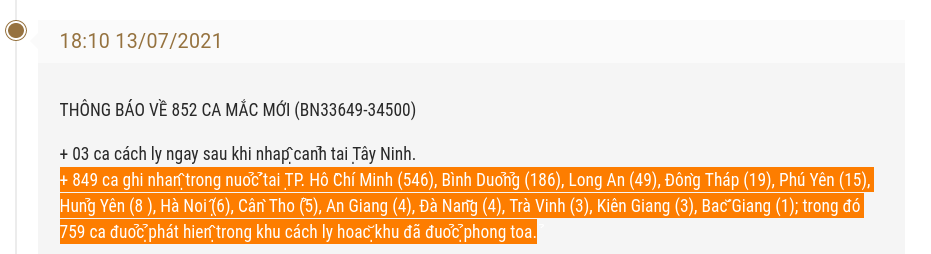
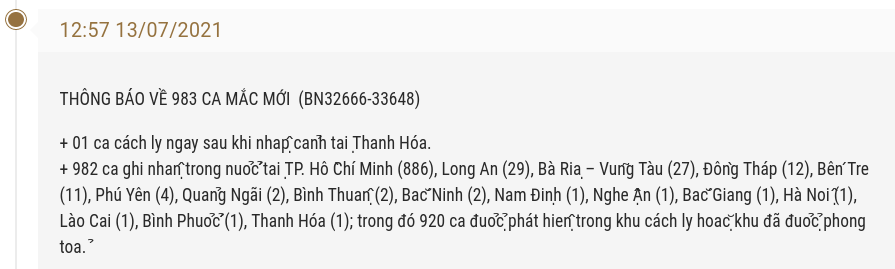
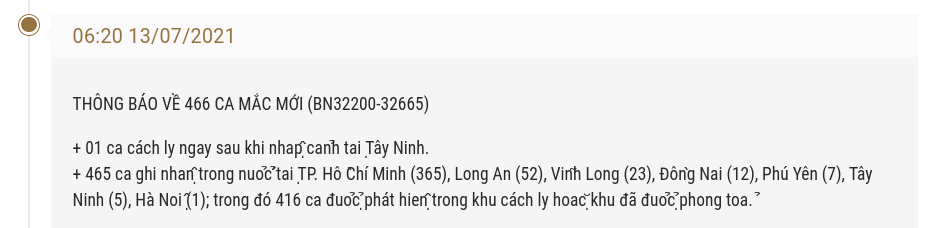



3. Vào trang parsing: https://truongan.github.io/T4C-news-parsing-regex/
4. Paste cả 3 đoạn trên vào text box ở giữa trang
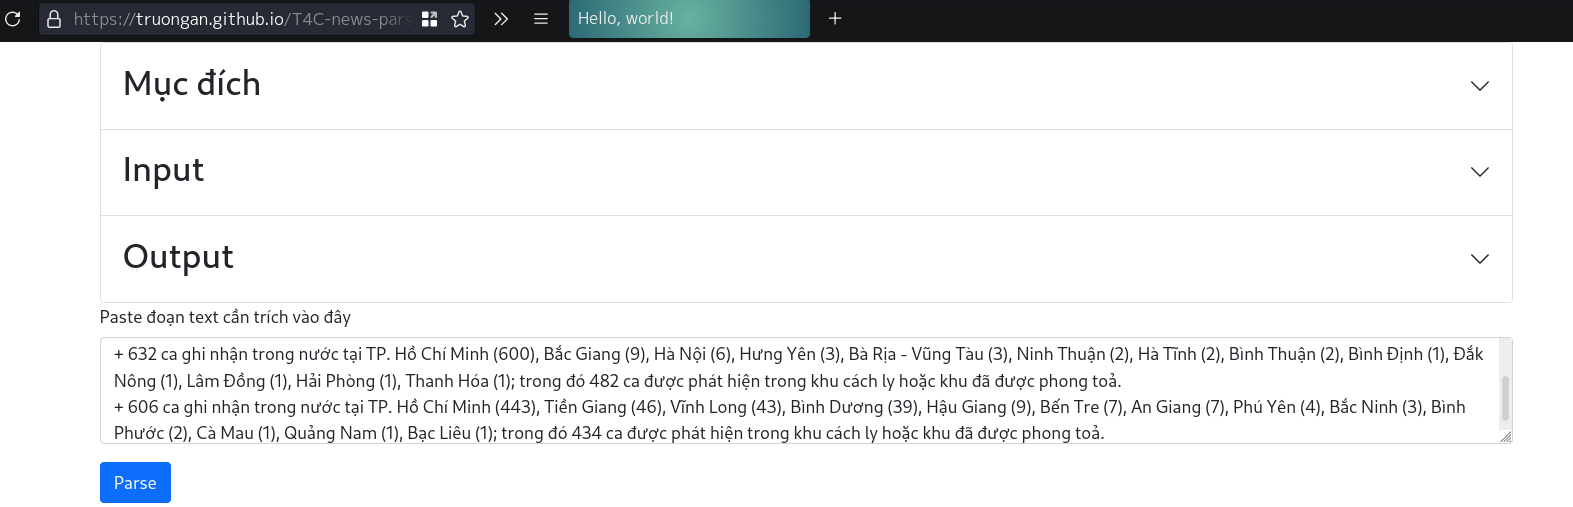


5. Sau khi paste xong thông tin ngày và buổi. Ngày là bắt buộc phải chọn, buổi thì dùng để kiểm tra lại khi cần. 
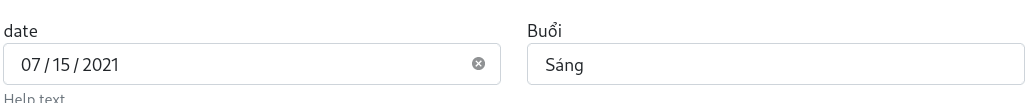



6. Bấm nút Parse Sẽ ra được một bảng thống kê bên dưới (một tỉnh có thể xuất hiện 3 lần, đó là bình thường
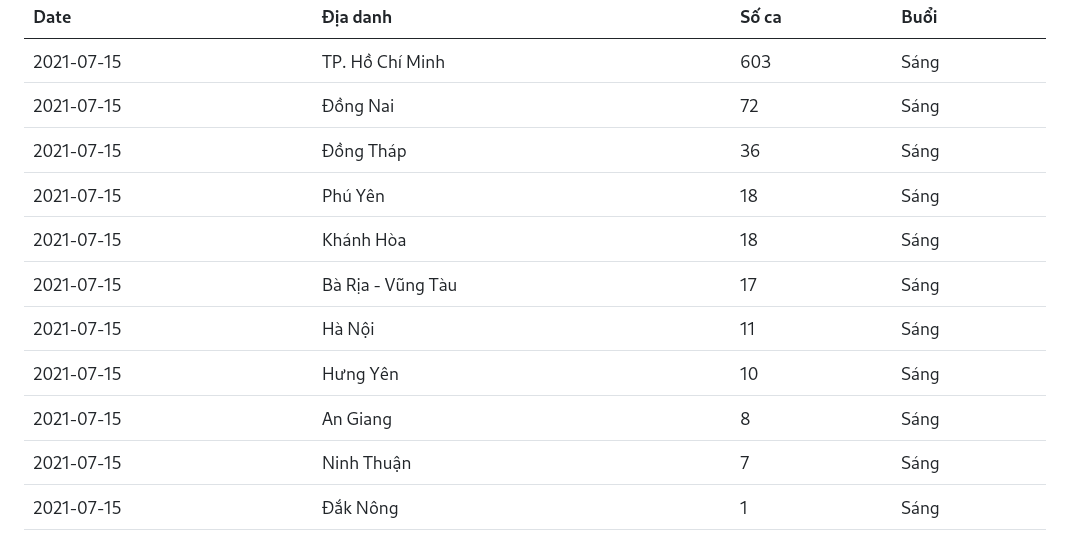

6. Vào sheets thống kê: https://docs.google.com/spreadsheets/d/1t9F7MtN-k1XcZHFQmtq0HQEKu1Do6MZiJVGESu39Tu0/edit?usp=sharing
7. Trong sheet "Parse data" paste nội dung của bảng thống kê mới tạo được ở trên vào cuối bảng. Cột ngày tháng năm được parse ở dạng format ISO8601 sẽ tự động được google sheet đổi về dạng ngày tháng năm theo quy tắc tiếng Việt 
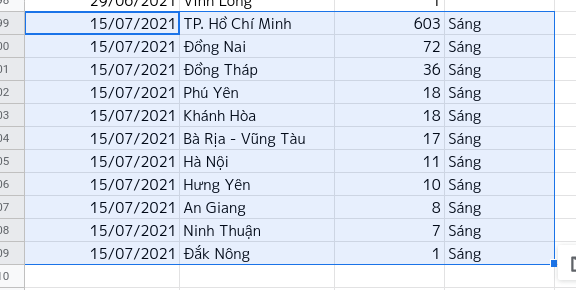

Sheet Pivot Table 1 sẽ update thống kê của các địa phương
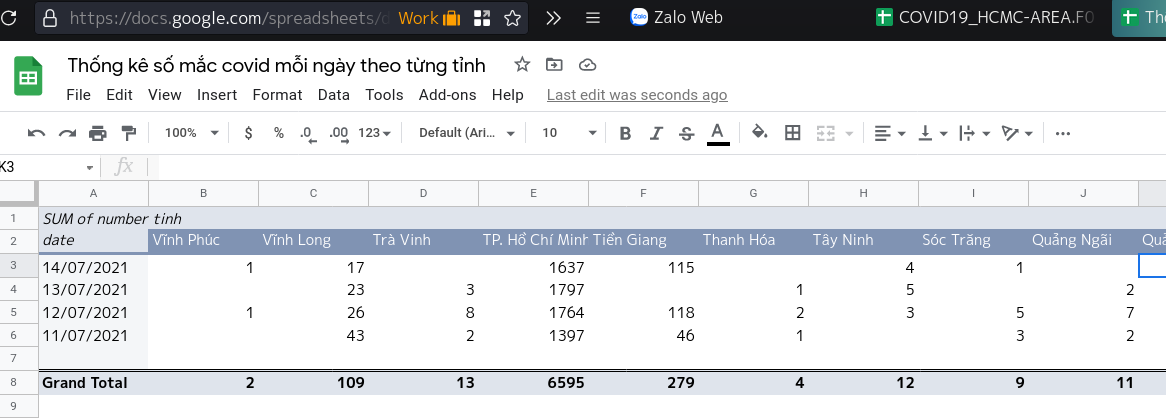


In [ ]:
instring1 = 'Tổng số ca nhiễm cộng đồng từ ngày 27/4 đến nay là 31.839, ghi nhận ở 58 tỉnh thành. Cụ thể, TP HCM 17.239, Bắc Giang 5.723, Bình Dương 1.814, Bắc Ninh 1.671, Đồng Tháp 649, Hà Nội 541 ca (trong đó Bệnh viện Bệnh nhiệt đới Trung ương 95 ca, 53 ca ở Bệnh viện K), Long An 523, Phú Yên 510, Tiền Giang 470, Đồng Nai 333, Đà Nẵng 274,'

In [ ]:
instring2 ='466 ca mới từ số 32200-32665. Trong đó, 465 ca ghi nhận tại: TP HCM (365), Long An (52), Vĩnh Long (23), Đồng Nai (12), Phú Yên (7), Tây Ninh (5), Hà Nội (1). Trong số này, 416 ca được phát hiện ở khu cách ly hoặc khu đã được phong tỏa.'

In [ ]:
import re
pattern = re.compile('(,|:) ([^\d]+)(\d+(.\d+)?)')

instring = instring1
# print (instring)
a = pattern.search(instring)

while a != None:
  #print(a)
  
  print(a.group(2), a.group(3),sep = ", ")
  a = pattern.search(instring, pos = a.end())


ghi nhận ở , 58
TP HCM , 17.239
Bắc Giang , 5.723
Bình Dương , 1.814
Bắc Ninh , 1.671
Đồng Tháp , 649
Hà Nội , 541
Long An , 523
Phú Yên , 510
Tiền Giang , 470
Đồng Nai , 333
Đà Nẵng , 274


# Input: URL
* https://vnexpress.net/them-909-ca-covid-19-rieng-tp-hcm-666-ca-4309108.html